# Customer Churn Prediction

## Problem Statement

The aim of this project is to estimate whether a bank's customers leave the bank or not. The event that defines the customer abandonment is the closing of the customer's bank account.

Details about the dataset:
It consists of 10000 observations and 12 variables. Independent variables contain information about customers. Dependent variable refers to customer abandonment status.

Variables:
RowNumber — corresponds to the record (row) number and has no effect on the output. This column will be removed.

CustomerId — contains random values and has no effect on customer leaving the bank. This column will be removed.

Surname — the surname of a customer has no impact on their decision to leave the bank. This column will be removed.

CreditScore — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

Geography — a customer’s location can affect their decision to leave the bank. We’ll keep this column.

Gender — it’s interesting to explore whether gender plays a role in a customer leaving the bank. We’ll include this column, too.

Age — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

Tenure — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

Balance — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

NumOfProducts — refers to the number of products that a customer has purchased through the bank.

HasCrCard — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. (0=No,1=Yes)

IsActiveMember — active customers are less likely to leave the bank, so we’ll keep this. (0=No,1=Yes)

EstimatedSalary — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

Exited — whether or not the customer left the bank. This is what we have to predict. (0=No,1=Yes)

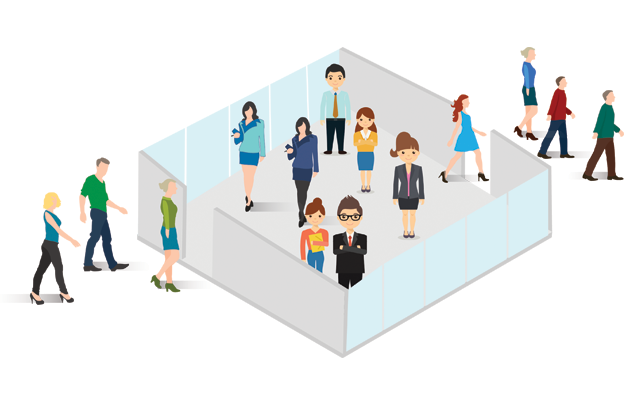

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix,classification_report

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Exporting the data

In [2]:
df = pd.read_csv("churn.csv")

## Data Analysis

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df['Exited'].unique()

array([1, 0], dtype=int64)

In [8]:
df['IsActiveMember'].unique()

array([1, 0], dtype=int64)

In [9]:
df['HasCrCard'].unique()

array([1, 0], dtype=int64)

In [10]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [11]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

In [12]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Data Visualization

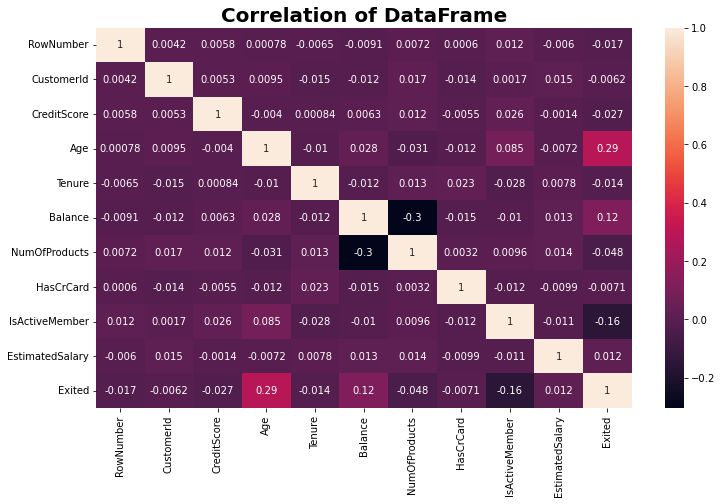

In [15]:
plt.figure(figsize=(12, 7))
plt.title("Correlation of DataFrame",size='20',weight='bold')
sns.heatmap(df.corr(),annot=True);

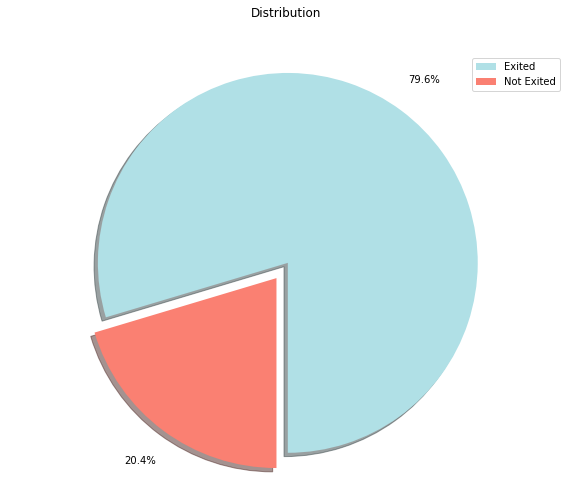

In [16]:
labels = ['Exited','Not Exited']
sizes = df['Exited'].value_counts()
colors = ['powderblue','Salmon']
explode = [0,0.1]
plt.figure(figsize=(10,8))
plt.pie(sizes,autopct='%1.1f%%',pctdistance=1.2,explode=explode,colors = colors,startangle=-90,shadow=True)
plt.axis('equal')
plt.title('Distribution\n\n')
plt.legend(labels=labels,loc='upper right')
plt.show()


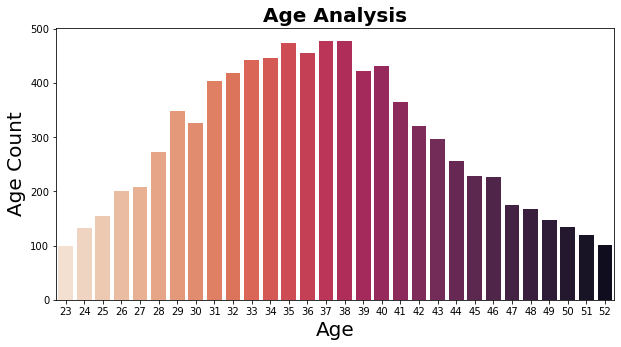

In [17]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df.Age.value_counts()[:30].index,y=df.Age.value_counts()[:30].values,palette='rocket_r')
plt.xlabel('Age',size='20')
plt.ylabel('Age Count',size='20')
plt.title('Age Analysis',size='20',weight='bold')
plt.show()

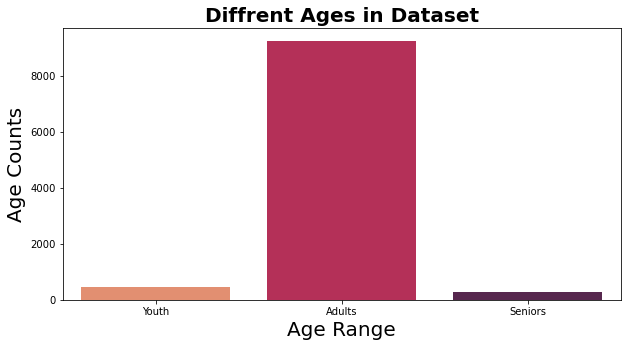

In [18]:
plt.figure(figsize=(10, 5))
minAge=min(df.Age)
maxAge=max(df.Age)
meanAge=df.Age.mean()
young_ages=df[(df.Age>=15)&(df.Age<=24)]
middle_ages=df[(df.Age>=25)&(df.Age<=64)]
elderly_ages=df[(df.Age>=65)]
sns.barplot(x=['Youth','Adults','Seniors'],y=[len(young_ages),len(middle_ages),
                                                             len(elderly_ages)],palette='rocket_r')
plt.xlabel('Age Range',size='20')
plt.ylabel('Age Counts',size='20')
plt.title('Diffrent Ages in Dataset',size='20',weight='bold')
plt.show()

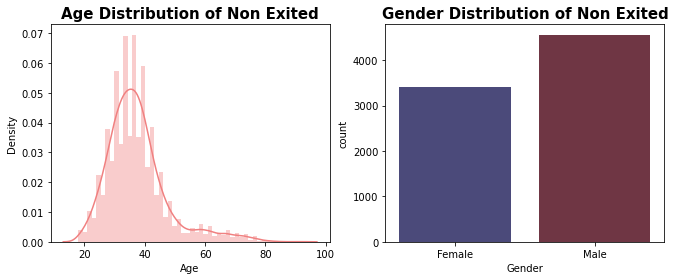

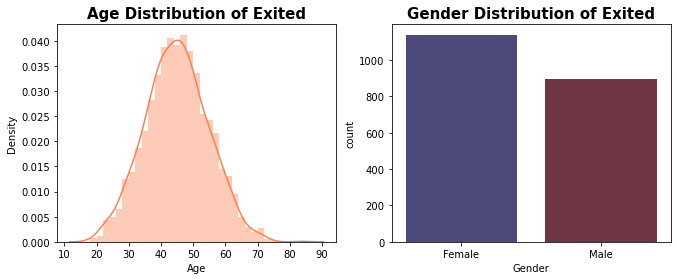

In [19]:
attr_1=df[df['Exited']==1]
attr_0=df[df['Exited']==0]

fig = plt.figure(figsize=(11,4))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['Age'],color='lightcoral');
plt.title('Age Distribution of Non Exited', fontsize=15, weight='bold');

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['Gender'], palette='icefire');
plt.title('Gender Distribution of Non Exited', fontsize=15, weight='bold' );
plt.show()

fig = plt.figure(figsize=(11,4))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['Age'],color='coral');
plt.title('Age Distribution of Exited', fontsize=15, weight='bold');

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['Gender'], palette='icefire');
plt.title('Gender Distribution of Exited', fontsize=15, weight='bold' );
plt.show()

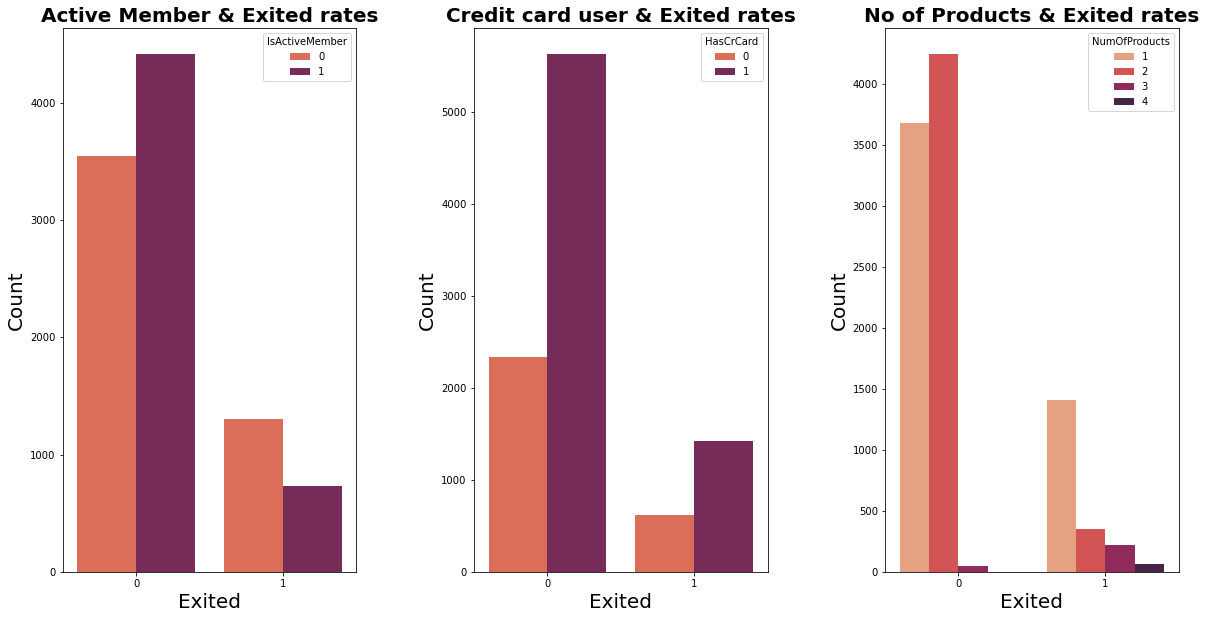

In [20]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,10))
plt.subplots_adjust(hspace=1, wspace=0.4)
sns.countplot(df.Exited,hue=df.IsActiveMember,palette='rocket_r',ax=ax1)
ax1.set_title('Active Member & Exited rates',size='20',weight='bold')
ax1.set_xlabel('Exited',size='20')
ax1.set_ylabel('Count',size='20')

sns.countplot(df.Exited,hue=df.HasCrCard,palette='rocket_r',ax=ax2)
ax2.set_title('Credit card user & Exited rates',size='20',weight='bold')
ax2.set_xlabel('Exited',size='20')
ax2.set_ylabel('Count',size='20')

sns.countplot(df.Exited,hue=df.NumOfProducts,palette='rocket_r',ax=ax3)
ax3.set_title('No of Products & Exited rates',size='20',weight='bold')
ax3.set_xlabel('Exited',size='20')
ax3.set_ylabel('Count',size='20')

plt.show()

## Outlier Detection

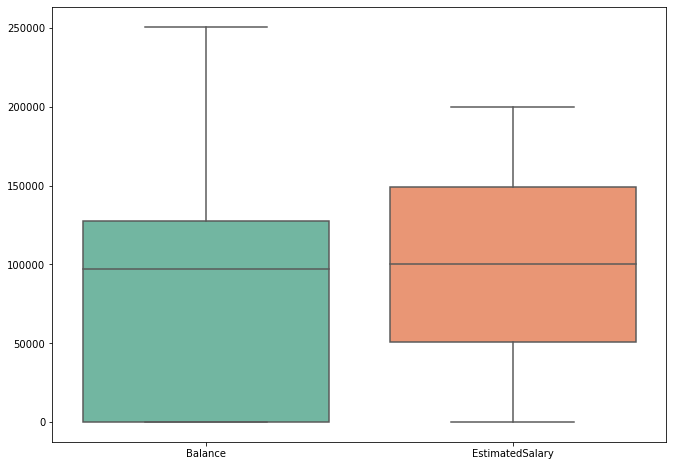

In [21]:
fig = plt.figure(figsize=(11,8))
outlier = df[['Balance','EstimatedSalary']]
ax = sns.boxplot(data=outlier, orient="v", palette="Set2")

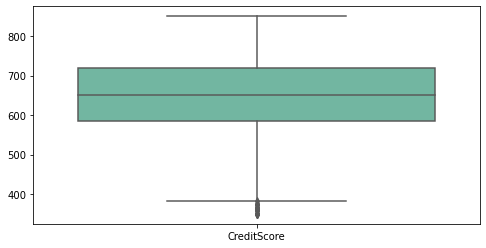

In [22]:
fig = plt.figure(figsize=(8,4))
outlier = df[['CreditScore']]
ax = sns.boxplot(data=outlier, orient="v", palette="Set2")

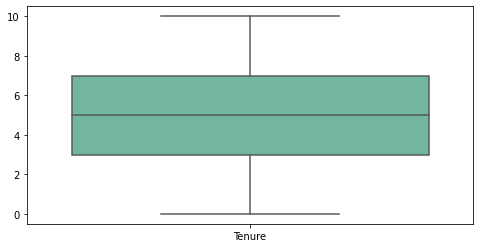

In [23]:
fig = plt.figure(figsize=(8,4))
outlier = df[['Tenure']]
ax = sns.boxplot(data=outlier, orient="v", palette="Set2")

In [24]:
Q1 = df['CreditScore'].quantile(0.25)
Q3 = df['CreditScore'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

if df[(df['CreditScore'] < lower) | (df['CreditScore'] > upper)].any(axis=None):
    print('CreditScore',"has outlier")
else:
    print('CreditScore', "has no outlier")

CreditScore has outlier


### Quantile based flooring and capping to remove outlier

In [25]:
print(df['CreditScore'].quantile(0.10))
print(df['CreditScore'].quantile(0.90))

521.0
778.0


In [26]:
df['CreditScore'] = np.where(df['CreditScore'] < 521, 521, df['CreditScore'])
df['CreditScore'] = np.where(df['CreditScore'] > 778, 778, df['CreditScore'])

## Feature Enconding

In [27]:
df = df.drop(["RowNumber","CustomerId", "Surname"], axis = 1)

In [28]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,521,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,778,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
dummies = pd.get_dummies(df.Gender)
dummies = dummies.drop("Male",axis='columns')
df_new = pd.concat([df,dummies],axis='columns')

In [30]:
dummies = pd.get_dummies(df.Geography)
dummies = dummies.drop("Germany",axis='columns')
df_new = pd.concat([df_new,dummies],axis='columns')

In [31]:
df_new = df_new.drop(["Geography","Gender"],axis = 1)
df_new.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,France,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,1
2,521,42,8,159660.80,3,1,0,113931.57,1,1,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,1,0
4,778,43,2,125510.82,1,1,1,79084.10,0,1,0,1
5,645,44,8,113755.78,2,1,0,149756.71,1,0,0,1
6,778,50,7,0.00,2,1,1,10062.80,0,0,1,0
7,521,29,4,115046.74,4,1,0,119346.88,1,1,0,0
8,521,44,4,142051.07,2,0,1,74940.50,0,0,1,0
9,684,27,2,134603.88,1,1,1,71725.73,0,0,1,0


In [32]:
data_frame = df_new[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','HasCrCard','IsActiveMember',
                'Female','France','Spain','Exited']]

## Data Splitting

In [33]:
X = data_frame.drop(['Exited'],axis='columns').values
y = data_frame.Exited.values

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## Balancing

In [35]:
from imblearn.combine import SMOTETomek

smk = SMOTETomek()
# Oversample training  data
X_train, y_train = smk.fit_resample(X_train, y_train)

# Oversample validation data
X_test, y_test = smk.fit_resample(X_test, y_test)

## Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:,0:6]=sc.fit_transform(X_train[:,0:6])
X_test[:,0:6]=sc.transform(X_test[:,0:6])

## Model Building

In [37]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

print("\nConfusion matrix of Train Data\n")
print(cm_train)
print("\nConfusion matrix of Test Data\n")
print(cm_test)
print('\nAccuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

print(classification_report(y_test,y_pred))


Confusion matrix of Train Data

[[3927 1516]
 [1536 3947]]

Confusion matrix of Test Data

[[975 364]
 [353 964]]

Accuracy for training set for Logistic Regression = 0.7206663005674537
Accuracy for test set for Logistic Regression = 0.7300451807228916
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1328
           1       0.73      0.73      0.73      1328

    accuracy                           0.73      2656
   macro avg       0.73      0.73      0.73      2656
weighted avg       0.73      0.73      0.73      2656



In [38]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

print("\nConfusion matrix of Train Data\n")
print(cm_train)
print("\nConfusion matrix of Test Data\n")
print(cm_test)
print('\nAccuracy for training set for KNeighbors Classifier = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for KNeighbors Classifier = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

print(classification_report(y_test,y_pred))


Confusion matrix of Train Data

[[4577  232]
 [ 886 5231]]

Confusion matrix of Test Data

[[1030  280]
 [ 298 1048]]

Accuracy for training set for KNeighbors Classifier = 0.8976752699981695
Accuracy for test set for KNeighbors Classifier = 0.7823795180722891
              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1328
           1       0.78      0.79      0.78      1328

    accuracy                           0.78      2656
   macro avg       0.78      0.78      0.78      2656
weighted avg       0.78      0.78      0.78      2656



In [39]:
classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

print("\nConfusion matrix of Train Data\n")
print(cm_train)
print("\nConfusion matrix of Test Data\n")
print(cm_test)
print('\nAccuracy for training set for SVC = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for SVC = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

print(classification_report(y_test,y_pred))


Confusion matrix of Train Data

[[4789  822]
 [ 674 4641]]

Confusion matrix of Test Data

[[1151  237]
 [ 177 1091]]

Accuracy for training set for SVC = 0.8630788943803771
Accuracy for test set for SVC = 0.8441265060240963
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1328
           1       0.86      0.82      0.84      1328

    accuracy                           0.84      2656
   macro avg       0.84      0.84      0.84      2656
weighted avg       0.84      0.84      0.84      2656



In [40]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

print("\nConfusion matrix of Train Data\n")
print(cm_train)
print("\nConfusion matrix of Test Data\n")
print(cm_test)
print('\nAccuracy for training set for Random Forest Classifier = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest Classifier = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

print(classification_report(y_test,y_pred))


Confusion matrix of Train Data

[[5463    0]
 [   0 5463]]

Confusion matrix of Test Data

[[1275  190]
 [  53 1138]]

Accuracy for training set for Random Forest Classifier = 1.0
Accuracy for test set for Random Forest Classifier = 0.9085090361445783
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1328
           1       0.96      0.86      0.90      1328

    accuracy                           0.91      2656
   macro avg       0.91      0.91      0.91      2656
weighted avg       0.91      0.91      0.91      2656



In [41]:
classifier = XGBClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

print("\nConfusion matrix of Train Data\n")
print(cm_train)
print("\nConfusion matrix of Test Data\n")
print(cm_test)
print('\nAccuracy for training set for Gradient Boosting Classifier = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Gradient Boosting Classifier = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

print(classification_report(y_test,y_pred))


Confusion matrix of Train Data

[[5420  261]
 [  43 5202]]

Confusion matrix of Test Data

[[1255  173]
 [  73 1155]]

Accuracy for training set for Gradient Boosting Classifier = 0.9721764598206114
Accuracy for test set for Gradient Boosting Classifier = 0.9073795180722891
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1328
           1       0.94      0.87      0.90      1328

    accuracy                           0.91      2656
   macro avg       0.91      0.91      0.91      2656
weighted avg       0.91      0.91      0.91      2656



In [42]:
classifier = LGBMClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

print("\nConfusion matrix of Train Data\n")
print(cm_train)
print("\nConfusion matrix of Test Data\n")
print(cm_test)
print('\nAccuracy for training set for LightGBM Classifier = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for LightGBM Classifier = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

print(classification_report(y_test,y_pred))


Confusion matrix of Train Data

[[5334  501]
 [ 129 4962]]

Confusion matrix of Test Data

[[1272  165]
 [  56 1163]]

Accuracy for training set for LightGBM Classifier = 0.942339373970346
Accuracy for test set for LightGBM Classifier = 0.9167921686746988
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1328
           1       0.95      0.88      0.91      1328

    accuracy                           0.92      2656
   macro avg       0.92      0.92      0.92      2656
weighted avg       0.92      0.92      0.92      2656



## Hyperparameter Tuning on Light GBM Classifier

In [43]:
classifier = LGBMClassifier(random_state = 1,  learning_rate = 0.05, max_depth = 2, n_estimators = 1000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

print('\nAccuracy for training set for LightGBM Classifier = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for LightGBM Classifier = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

print(classification_report(y_test,y_pred))


Accuracy for training set for LightGBM Classifier = 0.917993776313381
Accuracy for test set for LightGBM Classifier = 0.9122740963855421
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1328
           1       0.96      0.86      0.91      1328

    accuracy                           0.91      2656
   macro avg       0.92      0.91      0.91      2656
weighted avg       0.92      0.91      0.91      2656



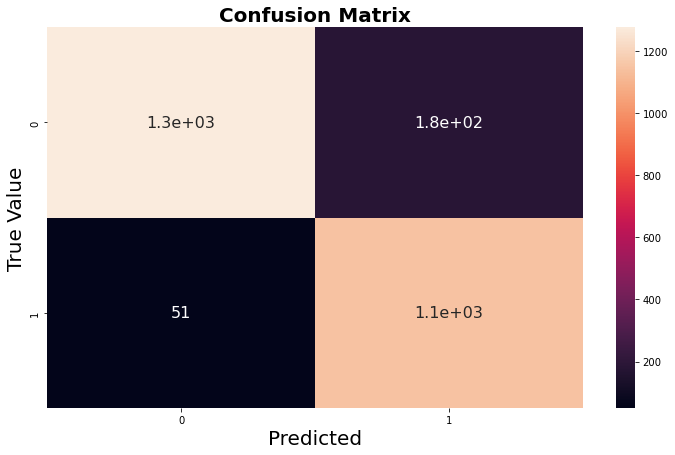

In [44]:
plt.figure(figsize=(12, 7))
sns.heatmap(cm_test, annot=True,annot_kws={"size": 16})
plt.title("Confusion Matrix",size='20',weight='bold')
plt.xlabel("Predicted",size='20')
plt.ylabel("True Value",size='20')
plt.show()

## Exporting Model

In [45]:
import pickle
with open('model.pickle','wb') as f:
    pickle.dump(classifier,f)